In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [ ]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0]).reshape(-1, 1)
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0]).reshape(-1, 1)

In [ ]:
train_input, test_input, train_target, test_target = train_test_split(
perch_length, perch_weight, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

print(knr.score(train_input, train_target))
knr.score(test_input, test_target)

0.9698823289099254


0.992809406101064

In [ ]:
from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_input)

mae = mean_absolute_error(test_target, test_prediction)

print(mae)

19.157142857142862


In [ ]:
knr.n_neighbors = 3   #이웃의 개수를 바꿔주면 과대적합 과소적합 문제를 해결할 수 있다

knr.fit(train_input, train_target)

print(knr.score(train_input, train_target))
knr.score(test_input, test_target)

0.9804899950518966


0.9746459963987609

In [ ]:
distances, indexes = knr.kneighbors([[50]])

print(distances, indexes)

[[6. 7. 7.]] [[34  8 14]]


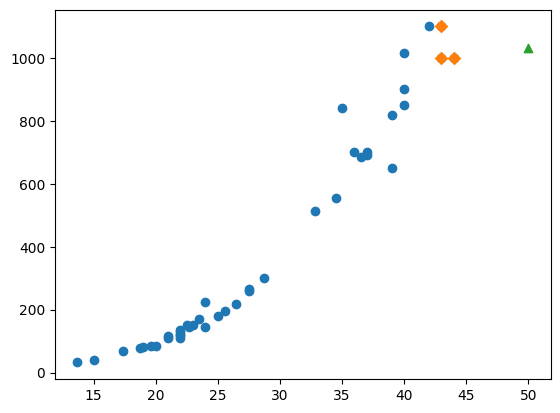

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(train_input, train_target)

plt.scatter(train_input[indexes], train_target[indexes], marker='D')

plt.scatter(50, 1033, marker='^')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input, train_target)


LinearRegression()

In [ ]:
print(lr.predict([[50]]))

[[1241.83860323]]


In [ ]:
print(lr.coef_, lr.intercept_)

[[39.01714496]] [-709.01864495]


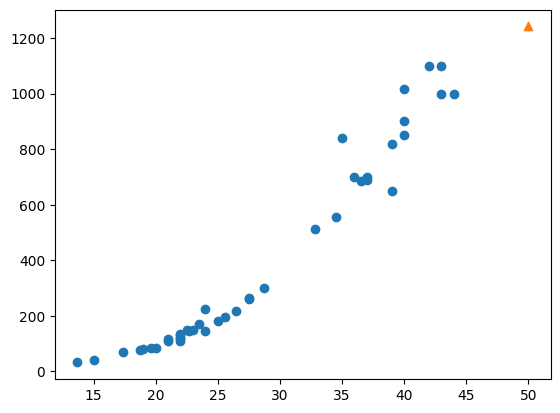

In [ ]:
#잘 모르겠네
plt.scatter(train_input, train_target)
y_values = np.array([15 * lr.coef_ + lr.intercept_, 50 * lr.coef_ + lr.intercept_])
y_values = np.squeeze(y_values)  # y 차원 축소

plt.scatter(50, 1241.8, marker='^')
plt.show()

In [ ]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

In [ ]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

LinearRegression()

In [ ]:
print(lr.predict([[50 ** 2, 50]]))

[[1573.98423528]]


In [ ]:
print(lr.coef_, lr.intercept_)
# 무게 - 1.01 x 길이^2 -21.6 x 길이 + 116.05

[[  1.01433211 -21.55792498]] [116.05021078]


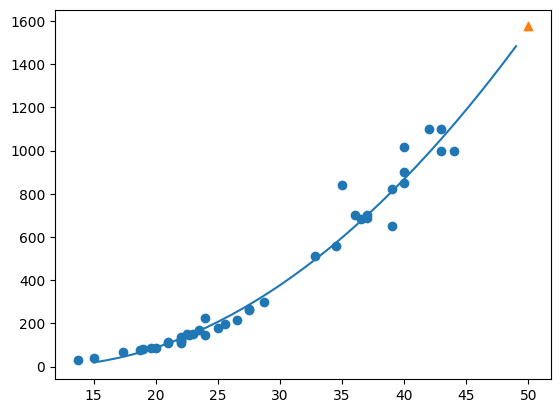

In [ ]:
point = np.arange(15, 50)
plt.scatter(train_input, train_target)
plt.plot(point, 1.01 * point ** 2 - 21.6 * point + 116.05)

plt.scatter([50], [1574], marker='^')
plt.show()

In [ ]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122


In [ ]:

lr = LinearRegression()
lr.fit(train_input, train_target)

print(lr.predict([[50]]))

print(lr.coef_, lr.intercept_)

[[1241.83860323]]
[[39.01714496]] [-709.01864495]


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('https://bit.ly/perch_csv')

perch_full = df.to_numpy()

In [ ]:

perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(include_bias=False)
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[2. 3. 4. 6. 9.]]


In [ ]:
poly = PolynomialFeatures(include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

(42, 2)


In [ ]:
poly.get_feature_names()
['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

test_poly = poly.transform(test_input)

AttributeError: 'PolynomialFeatures' object has no attribute 'get_feature_names'

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target)

SyntaxError: incomplete input (<ipython-input-149-8978e6c26be1>, line 6)